|     10     |  0.467426753810831   | 0.17184193930877523  |  -25.85279873459255 | -0.9664409722507763 |

Лучшее значение t = 48.5336
Значение функции f(t) = 52585.9850


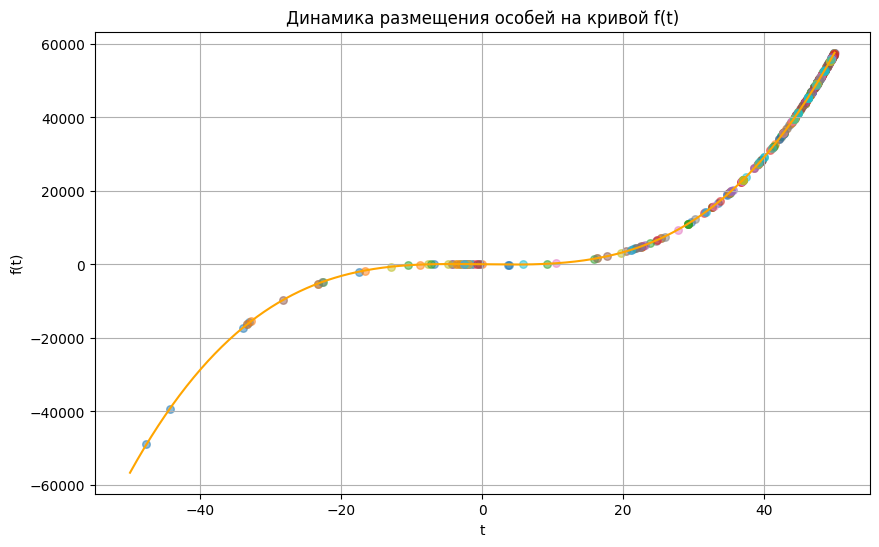

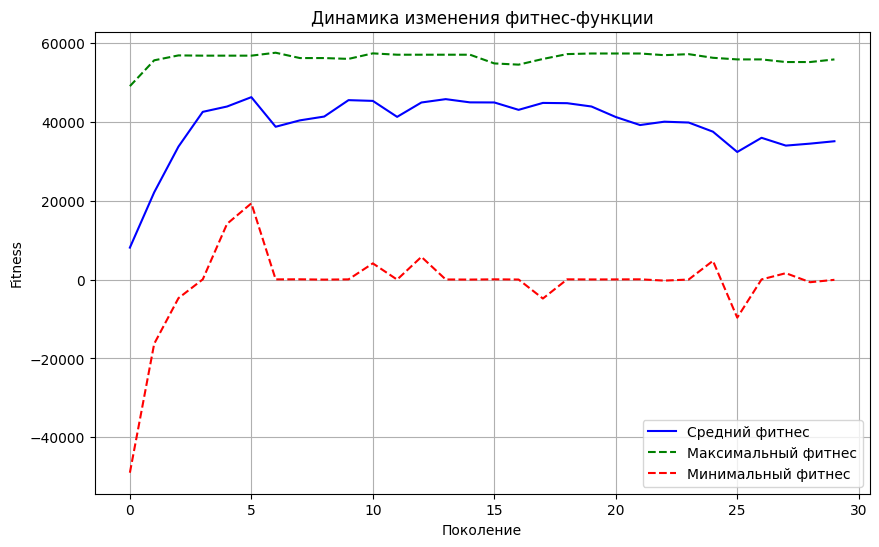

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random

a = 0.467426753810831
b = 0.17184193930877523
c = -25.85279873459255
Fitness = -0.9664409722507763  # сдвиг по оси Y (константа)
MODE = "max"  # можно сменить на "min"

POP_SIZE = 20        # размер популяции
GENS = 30            # поколений
CHROM_LEN = 16       # длина бинарной хромосомы
MUT_RATE = 0.05      # вероятность мутации
CROSS_RATE = 0.7     # вероятность кроссовера
T_MIN, T_MAX = -50, 50  # диапазон поиска

def f(t):
    return a * t**3 + b * t**2 + c * t + Fitness

def encode(t):
    ratio = (t - T_MIN) / (T_MAX - T_MIN)
    value = int(ratio * (2**CHROM_LEN - 1))
    return format(value, f"0{CHROM_LEN}b")

def decode(chrom):
    value = int(chrom, 2)
    ratio = value / (2**CHROM_LEN - 1)
    return T_MIN + ratio * (T_MAX - T_MIN)

def init_population():
    return [format(random.randint(0, 2**CHROM_LEN - 1), f"0{CHROM_LEN}b") for _ in range(POP_SIZE)]

def fitness(pop):
    values = [f(decode(ch)) for ch in pop]
    if MODE == "max":
        return values
    else:
        return [-val for val in values]  # для поиска минимума

def selection(pop, fits):
    total_fit = sum(fits) - min(fits) * len(fits)
    probs = [(fit - min(fits)) / total_fit if total_fit != 0 else 1/len(fits) for fit in fits]
    return random.choices(pop, weights=probs, k=POP_SIZE)

def crossover(p1, p2):
    if random.random() < CROSS_RATE:
        point = random.randint(1, CHROM_LEN - 1)
        return p1[:point] + p2[point:], p2[:point] + p1[point:]
    return p1, p2

def mutate(ch):
    ch_list = list(ch)
    for i in range(CHROM_LEN):
        if random.random() < MUT_RATE:
            ch_list[i] = '1' if ch_list[i] == '0' else '0'
    return ''.join(ch_list)

population = init_population()
history_t = []
avg_fitness, min_fitness, max_fitness = [], [], []

for gen in range(GENS):
    fits = fitness(population)
    decoded = [decode(ch) for ch in population]
    history_t.append(decoded)
    
    avg_fitness.append(sum(fits)/len(fits))
    min_fitness.append(min(fits))
    max_fitness.append(max(fits))
    
    selected = selection(population, fits)
    
    next_pop = []
    for i in range(0, POP_SIZE, 2):
        p1, p2 = selected[i], selected[min(i+1, POP_SIZE-1)]
        c1, c2 = crossover(p1, p2)
        next_pop += [mutate(c1), mutate(c2)]
    
    population = next_pop

final_fits = fitness(population)
best_idx = np.argmax(final_fits)
best_t = decode(population[best_idx])
best_val = f(best_t)

print(f"Лучшее значение t = {best_t:.4f}")
print(f"Значение функции f(t) = {best_val:.4f}")

t_vals = np.linspace(T_MIN, T_MAX, 400)
plt.figure(figsize=(10,6))
plt.plot(t_vals, f(t_vals), 'orange', label='f(t)')
for i, generation in enumerate(history_t):
    plt.scatter(generation, [f(t) for t in generation], s=30, alpha=0.5)
plt.title("Динамика размещения особей на кривой f(t)")
plt.xlabel("t")
plt.ylabel("f(t)")
plt.grid(True)
plt.show()

plt.figure(figsize=(10,6))
plt.plot(avg_fitness, 'b-', label='Средний фитнес')
plt.plot(max_fitness, 'g--', label='Максимальный фитнес')
plt.plot(min_fitness, 'r--', label='Минимальный фитнес')
plt.xlabel("Поколение")
plt.ylabel("Fitness")
plt.title("Динамика изменения фитнес-функции")
plt.legend()
plt.grid(True)
plt.show()
